<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:

# Verify the loaded data
print("Dataset shape:", boston_df.shape)
print("\nFirst 5 rows:")
print(boston_df.head())

# Check column names
print("\nColumn names:")
print(boston_df.columns)

Dataset shape: (506, 14)

First 5 rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  

Column names:
Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [5]:
# Basic statistics
print("\nDescriptive Statistics:")
print(boston_df.describe())

# Check for missing values
print("\nMissing Values:")
print(boston_df.isnull().sum())

# Data types
print("\nData Types:")
print(boston_df.dtypes)


Descriptive Statistics:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
st

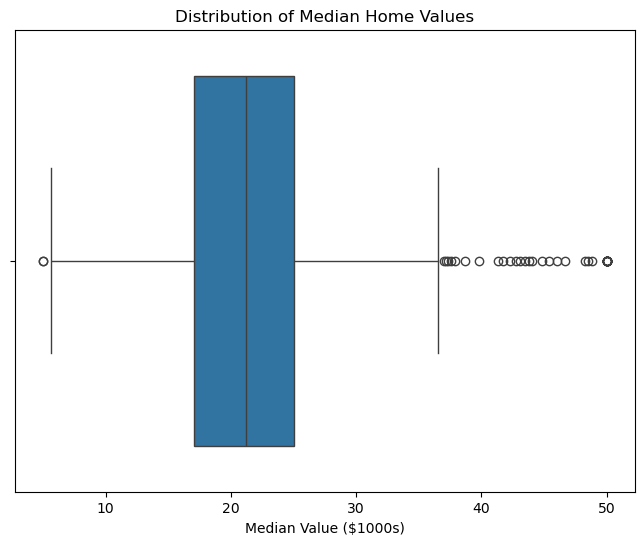

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Distribution of Median Home Values")
plt.xlabel("Median Value ($1000s)")
plt.show()

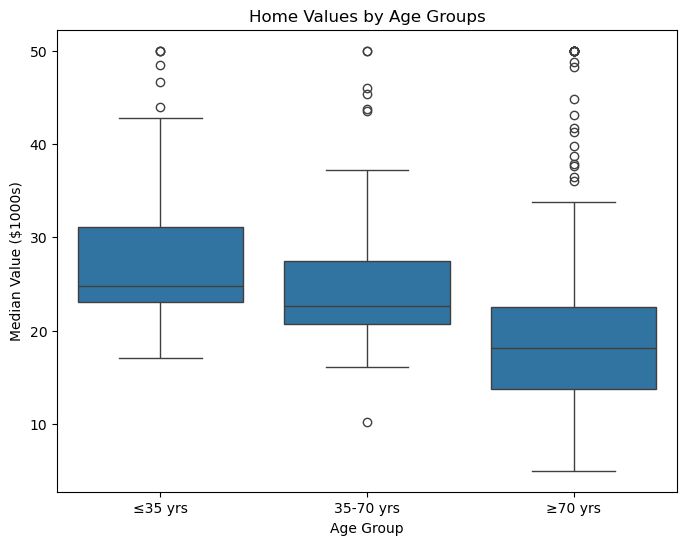

In [7]:
# Create age groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                               bins=[0, 35, 70, 100],
                               labels=["≤35 yrs", "35-70 yrs", "≥70 yrs"])

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title("Home Values by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000s)")
plt.show()

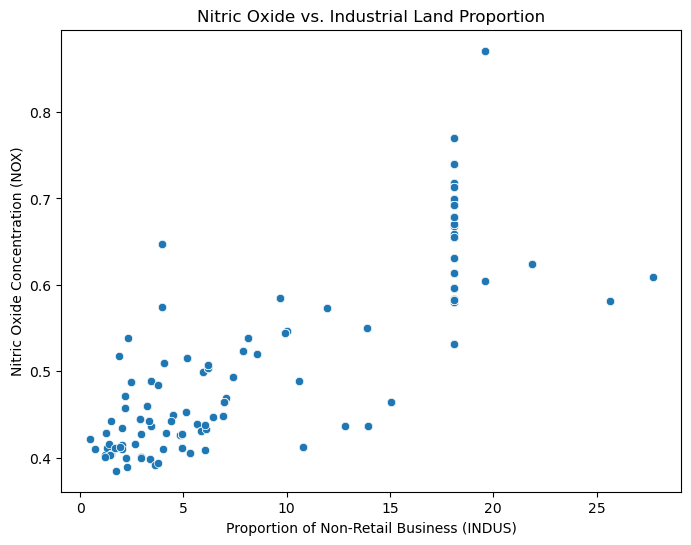

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Nitric Oxide vs. Industrial Land Proportion")
plt.xlabel("Proportion of Non-Retail Business (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

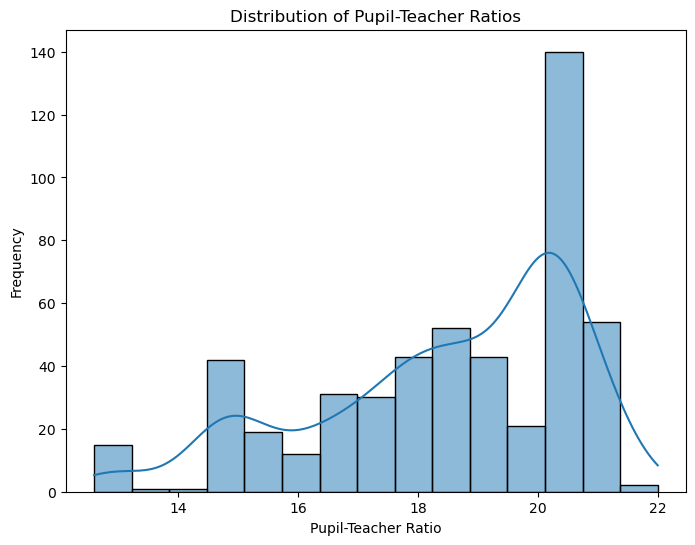

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title("Distribution of Pupil-Teacher Ratios")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

In [10]:
near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_near = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(near_river, not_near)
print(f"T-test for Charles River proximity:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

T-test for Charles River proximity:
T-statistic: 3.996, P-value: 0.0001


In [11]:
young = boston_df[boston_df['AGE_GROUP'] == "≤35 yrs"]['MEDV']
middle = boston_df[boston_df['AGE_GROUP'] == "35-70 yrs"]['MEDV']
old = boston_df[boston_df['AGE_GROUP'] == "≥70 yrs"]['MEDV']

f_stat, p_value = scipy.stats.f_oneway(young, middle, old)
print("\nANOVA for Age Groups:")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.4f}")


ANOVA for Age Groups:
F-statistic: 36.408, P-value: 0.0000


In [12]:
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation for NOX vs INDUS:")
print(f"Correlation: {corr:.3f}, P-value: {p_value:.4f}")


Pearson Correlation for NOX vs INDUS:
Correlation: 0.764, P-value: 0.0000


In [13]:
X = sm.add_constant(boston_df['DIS'])  # Add intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print("\nRegression Analysis for Distance to Employment Centers:")
print(model.summary())


Regression Analysis for Distance to Employment Centers:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        18:33:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------